In [41]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

In [42]:
# df_se_hours: number of volunteer hours, paid hours, total hours in special events; monthly; 2021-2023
# df_employee: number of employee; monthly; 2016-2025
# df_staff: number of volunteer vs paid staff; academic yearly; 2015-2024
# df_vol_hours: number of volunteer hours; monthly; 2020-2023
# df_edu_train_hours: number of education hours / training hours; yearly, 2010-2023

## Event Hours

In [43]:
df_event_hours = pd.read_csv("../data/Event_Hours.csv")
df_event_hours

,Month x Year,Staff,2021,2022,2023
0,January,Paid,25.25,31.25,59.50
1,NaN,Volunteers,3.75,NaN,12.50
2,NaN,Total,29.00,31.25,72.00
3,February,Paid,35.50,63.50,133.50
4,NaN,Volunteers,11.50,11.00,83.25
5,NaN,Total,47.00,74.50,216.75
6,March,Paid,270.50,280.75,205.00
7,NaN,Volunteers,NaN,32.75,48.25
8,NaN,Total,270.50,313.50,253.25
9,April,Paid,370.25,310.75,423.25


In [44]:
df_event_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month x Year  13 non-null     object 
 1   Staff         39 non-null     object 
 2   2021          35 non-null     float64
 3   2022          36 non-null     float64
 4   2023          36 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.6+ KB


In [45]:
df_event_hours.describe()

,2021,2022,2023
count,35.000000,36.000000,36.000000
mean,225.057143,284.777778,331.638889
std,404.130981,542.620921,620.406420
min,0.000000,7.500000,5.000000
25%,28.000000,30.250000,64.937500
50%,87.000000,132.375000,143.250000
75%,256.000000,311.437500,339.375000
max,1969.250000,2563.000000,2984.750000


Reorganize the Excel info and fix NaNs

In [46]:
totalhours = []
volhours = []
paidhours = []
date = []
for year in ['2021','2022','2023']:
    for i in range(len(df_event_hours)-3):
        if i % 3 == 2:
            totalhours.append(df_event_hours[year][i])
        elif i % 3 == 0:
            paidhours.append(df_event_hours[year][i])
            date.append(str(int((i/3) + 1)) + '/' + year[-2:])
        else:
            volhours.append(df_event_hours[year][i])
print(totalhours)
print(paidhours)
print(volhours)
print(date)
data = {'Date' : date,
        'Paid Hours' : paidhours,
        'Volunteer Hours': volhours,
        'Total Hours': totalhours}
df_se_hours = pd.DataFrame(data)
df_se_hours = df_se_hours.fillna(0)
print(df_se_hours)

[29.0, 47.0, 270.5, 370.25, 338.75, 101.25, 0.0, 40.5, 201.75, 207.5, 254.75, 108.0, 31.25, 74.5, 313.5, 338.0, 226.75, 16.25, 12.75, 147.25, 435.0, 513.25, 276.5, 178.0, 72.0, 216.75, 253.25, 473.0, 344.25, 71.0, 24.5, 184.0, 464.25, 511.5, 303.5, 66.75]
[25.25, 35.5, 270.5, 370.25, 81.5, 76.75, nan, 27.0, 186.25, 152.25, 219.0, 87.0, 31.25, 63.5, 280.75, 310.75, 219.25, 16.25, 12.75, 126.25, 377.0, 407.25, 262.0, 138.5, 59.5, 133.5, 205.0, 423.25, 323.0, 71.0, 24.5, 153.0, 337.75, 441.5, 298.5, 66.75]
[3.75, 11.5, nan, nan, 257.25, 24.5, nan, 13.5, 15.5, 55.25, 35.75, 21.0, nan, 11.0, 32.75, 27.25, 7.5, nan, nan, 21.0, 58.0, 106.0, 14.5, 39.5, 12.5, 83.25, 48.25, 49.75, 21.25, nan, nan, 31.0, 126.5, 70.0, 5.0, nan]
['1/21', '2/21', '3/21', '4/21', '5/21', '6/21', '7/21', '8/21', '9/21', '10/21', '11/21', '12/21', '1/22', '2/22', '3/22', '4/22', '5/22', '6/22', '7/22', '8/22', '9/22', '10/22', '11/22', '12/22', '1/23', '2/23', '3/23', '4/23', '5/23', '6/23', '7/23', '8/23', '9/23', '1

## Monthly Employee Enrollment

In [47]:
df_employee = pd.read_csv("../data/Monthly Employee Enrollment.csv")
sum(df_employee["Number_of_Employee"].isna())
df_employee

,Year_Month,Number_of_Employee
0,2016-01-01,3519
1,2016-02-01,3519
2,2016-03-01,3519
3,2016-04-01,3519
4,2016-05-01,3519
...,...,...
103,2025-08-01,5048
104,2025-09-01,5048
105,2025-10-01,5048
106,2025-11-01,5048


## Staffing

In [48]:
df_staffing = pd.read_csv("../data/Staffing.csv")
df_staffing


,Year,IC,DC,Total UG,Part Timers,Total People,TOTAL GRADUATE
0,15/16,7,44,51,34,86,0
1,16/17,7,42,49,30,81,0
2,17/18,7,39,46,30,78,1
3,18/19,7,67,74,28,103,0
4,19/20,7,60,67,24,93,0
5,20/21,7,61,68,22,91,0
6,21/22,7,54,63,28,92,0
7,22/23,8,64,72,26,99,0
8,23/24,7,57,64,30,97,0


In [49]:
df_staff = df_staffing[['Year', 'Total UG', 'Part Timers', 'Total People']]
totalppl = df_staffing['Total People']
other = totalppl - df_staffing['Total UG'] - df_staffing['Part Timers']
df_staff = df_staff.rename(columns={"Total UG": "Volunteer", "Part Timers": "Paid", "Total People": "Total"})
#print(df_staff)
df_staff["Volunteer"] = df_staff["Total"] - df_staff["Paid"]
df_staff

,Year,Volunteer,Paid,Total
0,15/16,52,34,86
1,16/17,51,30,81
2,17/18,48,30,78
3,18/19,75,28,103
4,19/20,69,24,93
5,20/21,69,22,91
6,21/22,64,28,92
7,22/23,73,26,99
8,23/24,67,30,97


## Volunteer Hours

In [50]:
df_vhours = pd.read_csv("../data/Volunteer hours.csv")
df_vhours = df_vhours[:25]
df_vhours = df_vhours[['Month', 'Member', '2020', '2021', '2022', '2023']]
df_vhours
#print(len(df_vhours))

,Month,Member,2020,2021,2022,2023
0,Jan,IC/T,888,720,1032,1230
1,NaN,DC/Observers,768,48,444,648
2,Feb,IC/T,"1,062",1344,1104,1352
3,NaN,DC/Observers,"1,200",528,1092,1308
4,Mar,IC/T,"1,104","1,488",1200,1348
5,NaN,DC/Observers,636,828,1152,1368
6,Apr,IC/T,"1,080",1440,1258,1435
7,NaN,DC/Observers,96,792,1200,1356
8,May,IC/T,"1,056","1,200","1,032",1258
9,NaN,DC/Observers,132,180,108,348


In [51]:
ichours = []
dchours = []
totalvhours = []
dates = []
for year in ['2020','2021','2022','2023']:
    for i in range(len(df_vhours)-1):
        df_vhours[year][i]= df_vhours[year][i].replace(', ' , '')    
        df_vhours[year][i]= df_vhours[year][i].replace(',' , '')
        if i % 2 == 0:
            ichours.append(df_vhours[year][i])
            totalvhours.append(int(df_vhours[year][i]))
        else:
            dchours.append(df_vhours[year][i])
            dates.append(str(int((i/2) + 1)) + '/' + year[-2:])
            totalvhours[-1] += int(df_vhours[year][i])
print(ichours)
print(dchours)
print(dates)
for h in range(len(totalvhours)):
    totalvhours[h] = str(totalvhours[h])
data1 = {'Date' : dates,
        'IC Hours' : ichours,
        'DC Hours': dchours,
        'Total Volunteer Hours': totalvhours}
df_vol_hours = pd.DataFrame(data1)
df_vol_hours

['888', '1062', '1104', '1080', '1056', '1248', '1032', '792', '720', '768', '720', '360', '720', '1344', '1488', '1440', '1200', '1210', '936', '832', '720', '789', '754', '480', '1032', '1104', '1200', '1258', '1032', '864', '744', '936', '720', '840', '752', '504', '1230', '1352', '1348', '1435', '1258', '1248', '744', '960', '720', '754', '732', '540']
['768', '1200', '636', '96', '132', '72', '48', '312', '1068', '1055', '1008', '192', '48', '528', '828', '792', '180', '240', '348', '432', '1200', '1188', '1116', '444', '444', '1092', '1152', '1200', '108', '180', '144', '586', '1152', '1332', '1320', '552', '648', '1308', '1368', '1356', '348', '612', '804', '948', '1248', '1452', '1392', '572']
['1/20', '2/20', '3/20', '4/20', '5/20', '6/20', '7/20', '8/20', '9/20', '10/20', '11/20', '12/20', '1/21', '2/21', '3/21', '4/21', '5/21', '6/21', '7/21', '8/21', '9/21', '10/21', '11/21', '12/21', '1/22', '2/22', '3/22', '4/22', '5/22', '6/22', '7/22', '8/22', '9/22', '10/22', '11/22', 

,Date,IC Hours,DC Hours,Total Volunteer Hours
0,1/20,888,768,1656
1,2/20,1062,1200,2262
2,3/20,1104,636,1740
3,4/20,1080,96,1176
4,5/20,1056,132,1188
5,6/20,1248,72,1320
6,7/20,1032,48,1080
7,8/20,792,312,1104
8,9/20,720,1068,1788
9,10/20,768,1055,1823


## Education vs Training Hours

In [52]:
df_edu_train_hours = pd.read_excel("../data/Education_Training_Hours.xlsx")
df_edu_train_hours

,Year,Education Hours,Training Hours
0,2010,454,620.0
1,2011,456,200.0
2,2012,1100,865.0
3,2013,740,1205.0
4,2014,850,938.0
5,2015,703,971.0
6,2016,703,994.0
7,2017,724,2167.0
8,2018,724,2885.0
9,2019,724,2161.5


## Housed vs OC staff

In [53]:
df_staff_loc = pd.read_csv("../data/REMS off-campus room.csv")
df_staff_loc = df_staff_loc[:84]
df_staff_loc = df_staff_loc.rename(columns={"Unnamed: 0": "Date"})
#df_staff_loc["Date"] = df_staff_loc["Date"].split("/")[0:2]
df_staff_loc = df_staff_loc[['Date', 'Shifts w room (12hr)', 'Hours with Room', 'Rolling Average', 'Month / Year']]
df_staff_loc

,Date,Shifts w room (12hr),Hours with Room,Rolling Average,Month / Year
0,2017/1/1,8.0,96.0,96.0,"42,736"
1,2017/2/1,14.0,168.0,132.0,"42,767"
2,2017/3/1,14.0,168.0,144.0,"42,795"
3,2017/4/1,12.0,144.0,144.0,"42,826"
4,2017/5/1,0.0,0.0,120.0,"42,856"
...,...,...,...,...,...
79,2023/8/1,20.0,240.0,210.0,"45,139"
80,2023/9/1,52.0,624.0,279.0,"45,170"
81,2023/10/1,51.0,612.0,405.0,"45,200"
82,2023/11/1,60.0,720.0,549.0,"45,231"


Clean the day in date, since it is monthly data

In [54]:
for i in range(len(df_staff_loc["Date"])):
    df_staff_loc["Date"][i] = df_staff_loc["Date"][i].split("/")[0] + "/" + df_staff_loc["Date"][i].split("/")[1]
df_staff_loc

/var/folders/nc/msb__ldd2wn4c7szd6_lx25r0000gn/T/ipykernel_94544/1563693123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_staff_loc["Date"][i] = df_staff_loc["Date"][i].split("/")[0] + "/" + df_staff_loc["Date"][i].split("/")[1]


,Date,Shifts w room (12hr),Hours with Room,Rolling Average,Month / Year
0,2017/1,8.0,96.0,96.0,"42,736"
1,2017/2,14.0,168.0,132.0,"42,767"
2,2017/3,14.0,168.0,144.0,"42,795"
3,2017/4,12.0,144.0,144.0,"42,826"
4,2017/5,0.0,0.0,120.0,"42,856"
...,...,...,...,...,...
79,2023/8,20.0,240.0,210.0,"45,139"
80,2023/9,52.0,624.0,279.0,"45,170"
81,2023/10,51.0,612.0,405.0,"45,200"
82,2023/11,60.0,720.0,549.0,"45,231"


Extract useful variable

In [55]:
shifts = df_staff_loc["Shifts w room (12hr)"]
shifts

0      8.0
1     14.0
2     14.0
3     12.0
4      0.0
      ... 
79    20.0
80    52.0
81    51.0
82    60.0
83    32.0
Name: Shifts w room (12hr), Length: 84, dtype: float64

In [56]:
room_hours = df_staff_loc["Hours with Room"]
room_hours

0      96.0
1     168.0
2     168.0
3     144.0
4       0.0
      ...  
79    240.0
80    624.0
81    612.0
82    720.0
83    384.0
Name: Hours with Room, Length: 84, dtype: float64

In [57]:
df_staff

,Year,Volunteer,Paid,Total
0,15/16,52,34,86
1,16/17,51,30,81
2,17/18,48,30,78
3,18/19,75,28,103
4,19/20,69,24,93
5,20/21,69,22,91
6,21/22,64,28,92
7,22/23,73,26,99
8,23/24,67,30,97


Generate x variables - yearly to monthly

In [58]:
vol_staff = df_staff["Volunteer"]
volunteer_staff = []
for i in range(len(vol_staff)):
    if i > 7:
        for j in range(6):
            volunteer_staff.append(vol_staff[i])
    elif i > 1:
        for j in range(12):
            volunteer_staff.append(vol_staff[i])
    elif i > 0:
        for j in range(6):
            volunteer_staff.append(vol_staff[i])
len(volunteer_staff)

84

In [59]:
pay_staff = df_staff["Paid"]
paid_staff = []
for i in range(len(pay_staff)):
    if i > 7:
        for j in range(6):
            paid_staff.append(pay_staff[i])
    elif i > 1:
        for j in range(12):
            paid_staff.append(pay_staff[i])
    elif i > 0:
        for j in range(6):
            paid_staff.append(pay_staff[i])
len(paid_staff)

84

In [60]:
tot_staff = df_staff["Total"]
total_staff = []
for i in range(len(tot_staff)):
    if i > 7:
        for j in range(6):
            total_staff.append(tot_staff[i])
    elif i > 1:
        for j in range(12):
            total_staff.append(tot_staff[i])
    elif i > 0:
        for j in range(6):
            total_staff.append(tot_staff[i])
len(total_staff)

84

Construct dataframe for cleaned data - prep for linear regression

In [61]:
data2 = {"Date": df_staff_loc["Date"],
        "Hours": room_hours, 
         "Paid Staff": paid_staff, 
         "Volunteer Staff": volunteer_staff,
         "Total Staff": total_staff}
df_staff_oc = pd.DataFrame(data2)
df_staff_oc
#type(df_staff_oc["Paid Staff"][1])

,Date,Hours,Paid Staff,Volunteer Staff,Total Staff
0,2017/1,96.0,30,51,81
1,2017/2,168.0,30,51,81
2,2017/3,168.0,30,51,81
3,2017/4,144.0,30,51,81
4,2017/5,0.0,30,51,81
...,...,...,...,...,...
79,2023/8,240.0,30,67,97
80,2023/9,624.0,30,67,97
81,2023/10,612.0,30,67,97
82,2023/11,720.0,30,67,97


## Save data into new file

In [62]:
df_staff_oc.to_csv('../data/staff_room_hours.csv', index=False)
df_staff.to_csv('../data/staff_data_model.csv', index=False)

Correlation map

/var/folders/nc/msb__ldd2wn4c7szd6_lx25r0000gn/T/ipykernel_94544/1495012840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_staff_oc.corr()


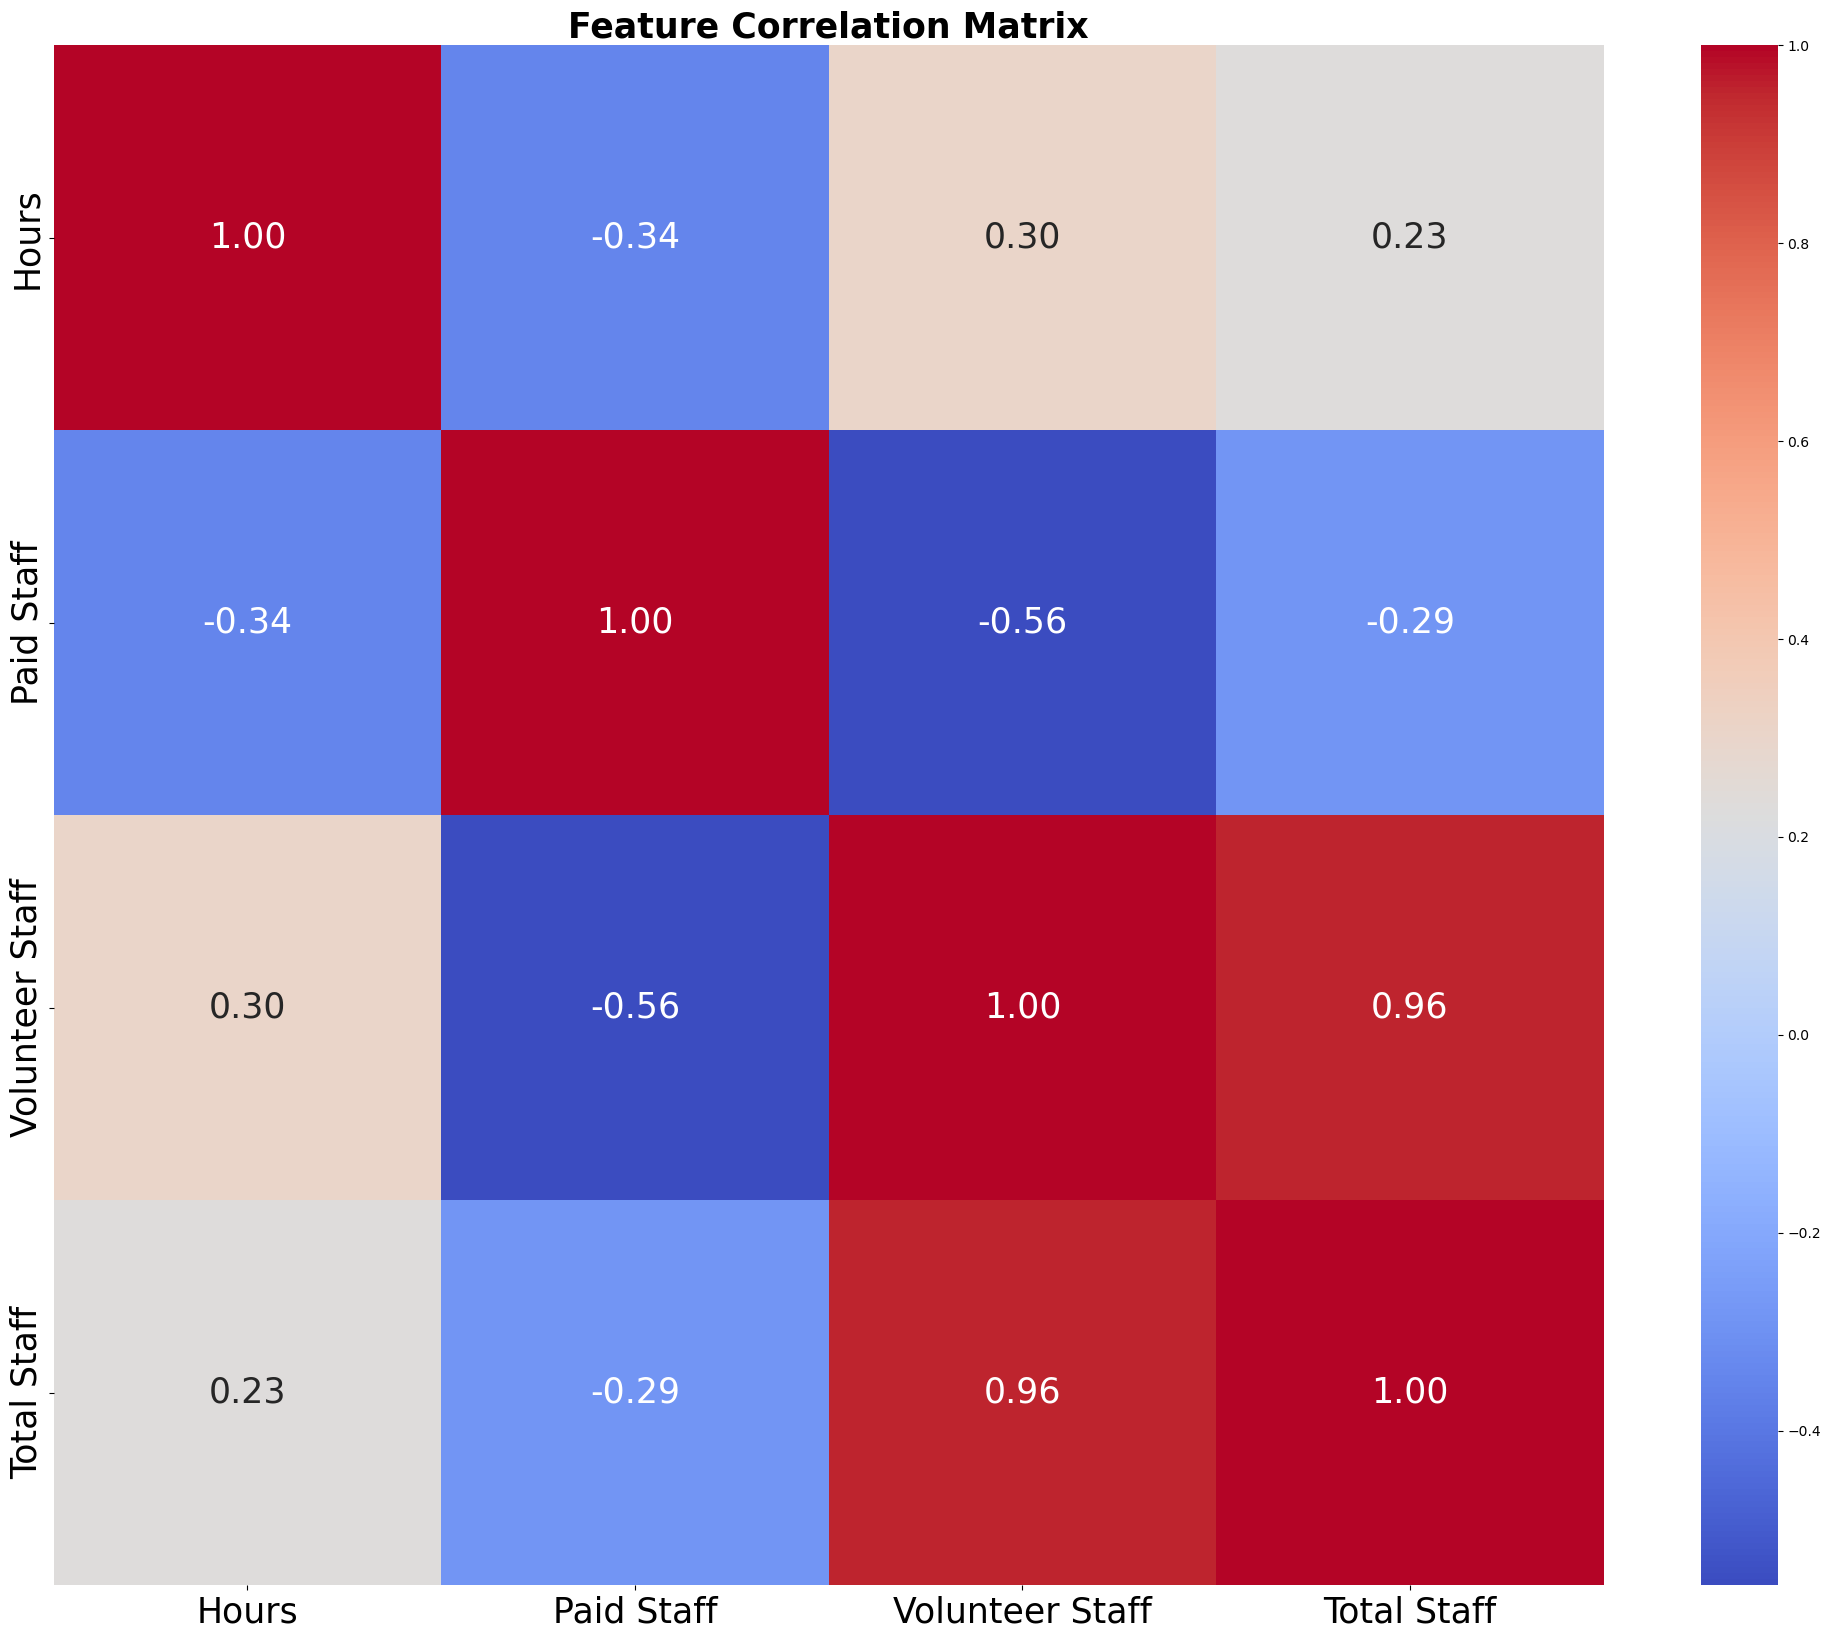

In [63]:
corr_matrix = df_staff_oc.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"fontsize":25})
plt.title('Feature Correlation Matrix', fontsize=25, fontweight='bold', color='black')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

It is surprising that there is a negative correlation between paid staff count and hours of on-campus room used. Generally we would think that the paid staff are not undergraduates and thus do not have rooms on campus and will need to use the REMS room during shifts. 

The positive correlations between total staff and hours, and between volunteer staff and hours both make sense.

Contruct linear regression data

In [64]:
X = df_staff_oc[["Paid Staff", "Volunteer Staff"]]
y = df_staff_oc["Hours"]

Separate data into training and testing sample

In [65]:
X_train, X_test,\
  y_train, y_test = train_test_split(X, y,
                    test_size=0.4,
                    random_state=1)

Train model

In [66]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Model performance

In [67]:
# regression coefficients
print('Coefficients: ', reg.coef_/12) # Divide by 12 to get the shift number (normalize), as we assume each person works entire shifts to get the relationship
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-4.9490709   0.35169803]
Variance score: -0.28129274448601715


Interpretation for coefficients:
    Paid staffs work 5 shifts per month per person on average, and reduce down room usage with their existence (strange)
    Volunteer staffs work 0.3 shifts per month per person on average, which is the same as saying 30% of them use the down room since they are OC.

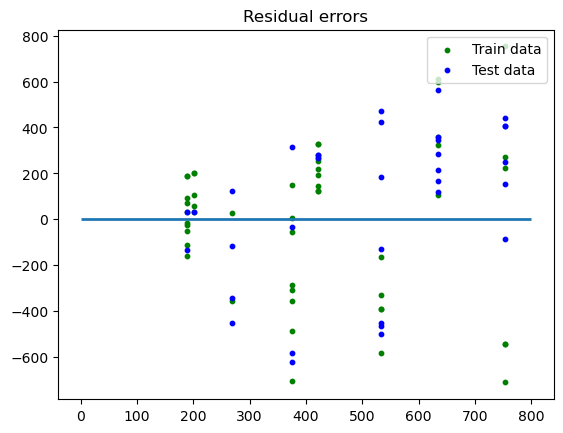

In [68]:
# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=800, linewidth=2)

plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()

The residuals can be fairly large. For the same staff count over a year, we get variable shift hours during different months since the hour data is monthly.

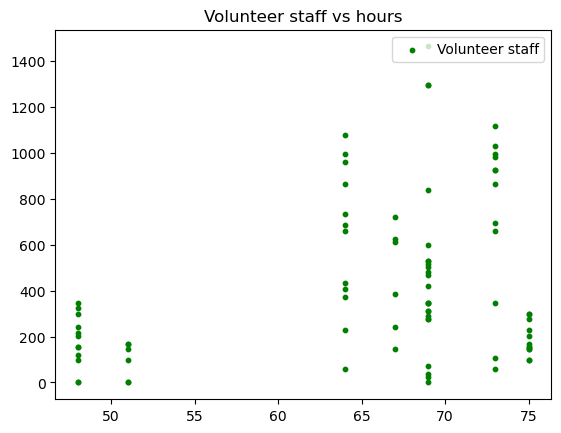

In [69]:
plt.scatter(X["Volunteer Staff"], y,
            color="green", s=10,
            label='Volunteer staff')
plt.legend(loc='upper right')
plt.title("Volunteer staff vs hours")
plt.show()

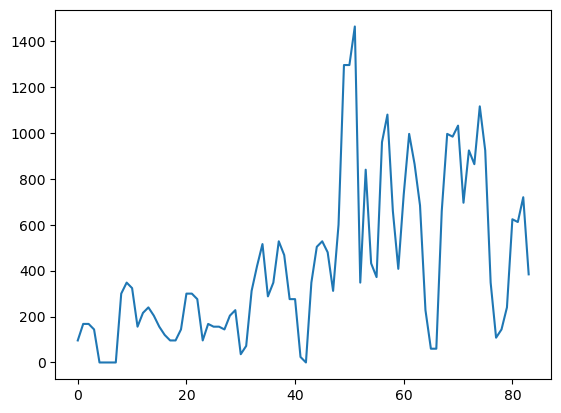

In [70]:
plt.plot(y)

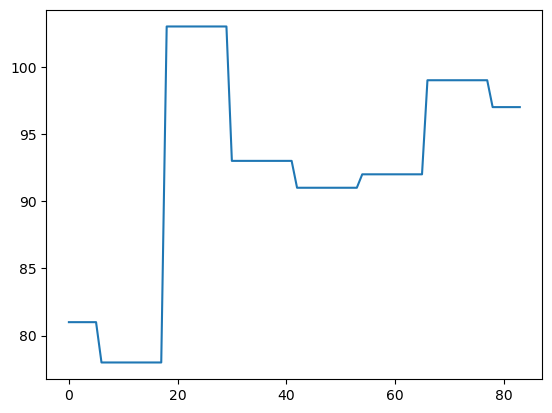

In [71]:
plt.plot(df_staff_oc["Total Staff"])

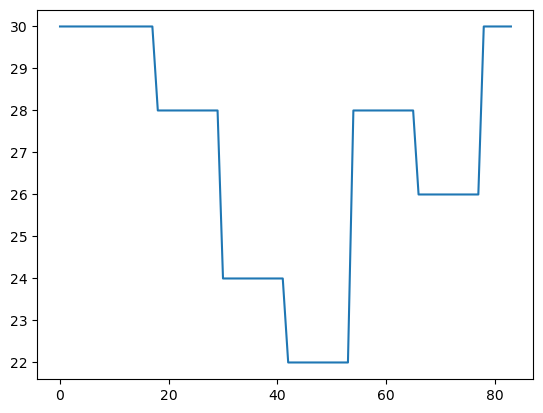

In [72]:
plt.plot(df_staff_oc["Paid Staff"])

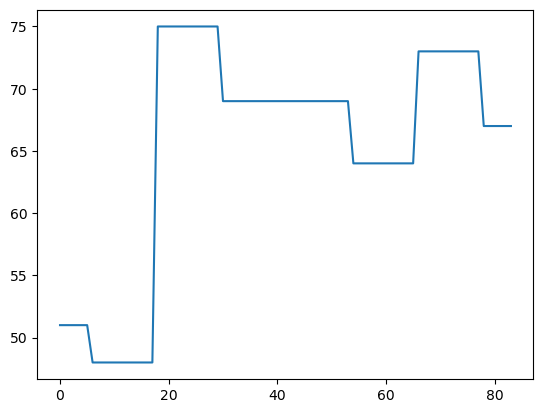

In [73]:
plt.plot(df_staff_oc["Volunteer Staff"])

# Run linear regression on volunteer staff only
Because the paid staff negative coefficient and correlation is hard for interpretation

In [74]:
reg1 = linear_model.LinearRegression()
reg1.fit(X[['Volunteer Staff']], y)

LinearRegression()

In [75]:
print('Coefficients: ', reg1.coef_/12)

Coefficients:  [0.96963966]


Interpretation for coefficient: all volunteer staff are OC and use the down room during shifts

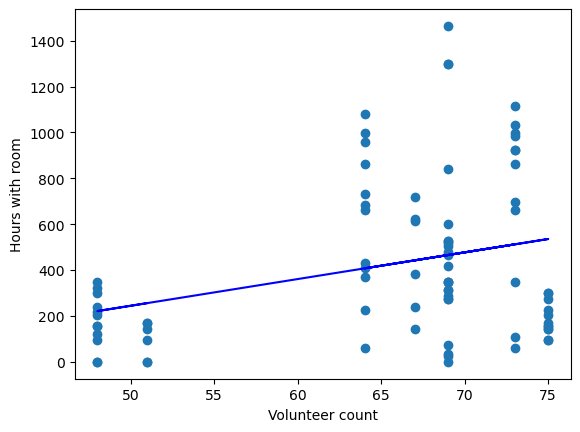

In [76]:
plt.xlabel("Volunteer count")
plt.ylabel("Hours with room")
plt.scatter(X[["Volunteer Staff"]], y)
plt.plot(X[["Volunteer Staff"]], reg1.predict(X[["Volunteer Staff"]]), color='blue')

In [77]:
reg2 = linear_model.LinearRegression()
reg2.fit(X[['Paid Staff']], y)

LinearRegression()

In [78]:
print('Coefficients: ', reg2.coef_/12)

Coefficients:  [-3.58116319]


# Run linear regression on total staff

In [79]:
reg3 = linear_model.LinearRegression()
reg3.fit(df_staff_oc[['Total Staff']], y)

LinearRegression()

In [80]:
print('Coefficients: ', reg3.coef_/12)

Coefficients:  [0.84200151]


Interpretation on coefficient: the proportion of OC staff is 84%, who use the down room for shifts